<a href="https://colab.research.google.com/github/suelen-prs/Exercicios-EBAC/blob/master/mod27_Tarefa01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA - Tarefa 01: *HAR* com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [6]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

filename_features = "features.txt"
filename_labels = "activity_labels.txt"

filename_subtrain = "subject_train.txt"
filename_xtrain = "X_train.txt"
filename_ytrain = "y_train.txt"

filename_subtest = "subject_test.txt"
ffilename_xtest = "X_test.txt"
filename_ytest = "y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

<ipython-input-6-f2be7695c998>:21: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
<ipython-input-6-f2be7695c998>:24: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
<ipython-input-6-f2be7695c998>:28: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)


## Árvore de decisão

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

In [17]:
%%time
clf = DecisionTreeClassifier(ccp_alpha=0.001)

clf.fit(X_train, y_train)

# Avaliação da acurácia do classificador nos dados de treinamento e de teste
print(f'Acurácia na base de treinamento: {clf.score(X_train, y_train)}')
print(f'Acurácia na base de teste: {clf.score(X_test, y_test)}\n')

Acurácia na base de treinamento: 0.9757889009793254
Acurácia na base de teste: 0.8795385137427892

CPU times: user 4.47 s, sys: 0 ns, total: 4.47 s
Wall time: 4.47 s


## Árvore com PCA

Faça uma análise de componemtes principais das variáveis originais. Utilize apenas uma componente. Faça uma árvore de decisão com esta componente como variável explicativa.

- Avalie a acurácia nas bases de treinamento e teste
- Avalie o tempo de processamento

In [18]:
%%time
# PCA
prcomp = PCA(n_components=1).fit(X_train)

# Gero a componente para bases
pc_treino = prcomp.transform(X_train)
pc_teste  = prcomp.transform(X_test)

# Modelo
clf = DecisionTreeClassifier(ccp_alpha=0.001).fit(pc_treino, y_train)

# Avaliação das acurácias
print(f'Acurácia treino = {accuracy_score(y_train, clf.predict(pc_treino))}')
print(f'Acurácia teste  = {accuracy_score(y_test, clf.predict(pc_teste))}')

Acurácia treino = 0.499727965179543
Acurácia teste  = 0.45707499151679676
CPU times: user 363 ms, sys: 92.1 ms, total: 455 ms
Wall time: 247 ms


## Testando o número de componentes

Com base no código acima, teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[1, 2, 5, 10, 50]```. Avalie para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


In [9]:
%%time
prcomp = PCA().fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste = prcomp.transform(X_test)

CPU times: user 1.3 s, sys: 142 ms, total: 1.44 s
Wall time: 764 ms


In [16]:
%%time
lista = [1, 2, 5, 10, 50]
score_train = []
score_test = []

for n in lista:
    colunas = ['cp'+str(x+1) for x in list(range(n))]

    pc_train = pd.DataFrame(pc_treino[:, :n], columns=colunas)
    pc_test = pd.DataFrame(pc_teste[:, :n], columns=colunas)

    clf = DecisionTreeClassifier(random_state=100, ccp_alpha=0.001).fit(pc_train, y_train)

    s_tr = clf.score(pc_train, y_train)
    score_train.append(s_tr)

    s_te = clf.score(pc_test, y_test)
    score_test.append(s_te)


resultados = {'quantidade_componentes': lista, 'score_treino': score_train, 'score_teste': score_test}

df = pd.DataFrame(resultados)
df

CPU times: user 839 ms, sys: 0 ns, total: 839 ms
Wall time: 1.03 s


,quantidade_componentes,score_treino,score_teste
0,1,0.499728,0.457075
1,2,0.612758,0.584662
2,5,0.846028,0.788938
3,10,0.892682,0.823889
4,50,0.919342,0.823210


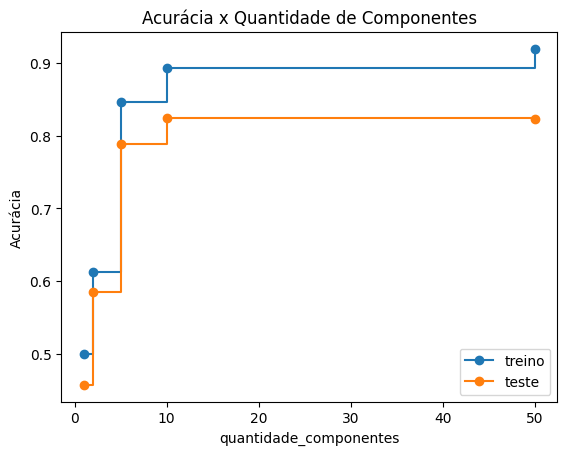

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_xlabel("quantidade_componentes")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x Quantidade de Componentes")
ax.plot(df['quantidade_componentes'], df['score_treino'], marker='o', label="treino", drawstyle="steps-post")
ax.plot(df['quantidade_componentes'], df['score_teste'], marker='o', label="teste", drawstyle="steps-post")

ax.legend()
plt.show()

In [15]:
%%time
n = 50

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:, :n], columns=colunas)
pc_test = pd.DataFrame(pc_teste[:, :n], columns=colunas)

clf = DecisionTreeClassifier(random_state=1234, ccp_alpha=0.001).fit(pc_train, y_train)

CPU times: user 516 ms, sys: 269 µs, total: 516 ms
Wall time: 672 ms


## Conclua

- O que aconteceu com a acurácia?
- O que aconteceu com o tempo de processamento?

A precisão melhorou até atingir dez componentes, permanecendo estável nos conjuntos de teste e treinamento.

Houve uma redução no tempo de processamento.